In [208]:
# Importimg the required libraries
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn	as sns

In [188]:
# Enable cache
ff1.Cache.enable_cache('cache')

# Setup plotting 
plotting.setup_mpl()

C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [189]:
# Load the data
# ff1.get_session(year, race, session)
# Q qualifying, FP1, FP2, FP3, R race

session = ff1.get_session(2021, "Abu Dhabi", "Q")

# Load session data
session.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:1591: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-package

In [190]:
best_ver = session.laps.pick_driver('VER').pick_fastest()

best_ver	

C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Time                      0 days 01:09:12.931000
Driver                                       VER
DriverNumber                                  33
LapTime                   0 days 00:01:22.109000
LapNumber                                   15.0
Stint                                        4.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:16.853000
Sector2Time               0 days 00:00:35.643000
Sector3Time               0 days 00:00:29.613000
Sector1SessionTime        0 days 01:08:07.675000
Sector2SessionTime        0 days 01:08:43.318000
Sector3SessionTime        0 days 01:09:12.931000
SpeedI1                                    295.0
SpeedI2                                    324.0
SpeedFL                                    225.0
SpeedST                                    324.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [207]:
df = session.laps.pick_driver('VER')

# df

# save df to csv
df.to_csv('verstappen_abudhabi_quali.csv')

C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [191]:
# Selecting laps for verstappen and hamilton
laps_ver = session.laps.pick_drivers('VER')
laps_ham = session.laps.pick_drivers('HAM')

# laps_ver

In [192]:
# Get telemetry data for fastest lap
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_ham = laps_ham.pick_fastest().get_telemetry().add_distance()



C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] \
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] \
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

In [193]:
# Creating column name
fastest_ver['Driver'] = 'VER'
fastest_ham['Driver'] = 'HAM'


# Merging the data
telemetry = fastest_ver.append(fastest_ham)

C:\Users\rhihi\AppData\Local\Temp\ipykernel_33120\1372731268.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = fastest_ver.append(fastest_ham)


In [194]:
# we want 25 mini sectors 
num_mini_sectors = 25

# gran max value of distance that is known in telemetry
total_distance = max(telemetry['Distance'])

# create the mini sectors equally spaced
minisector_length = total_distance / num_mini_sectors

In [195]:
# init minisector variable
minisector = [0]

# adding multiple of minisectors_length to minisector
for i in range(0, (num_mini_sectors - 1)):
    minisector.append(minisector_length * (i + 1))


In [196]:
# creating Minisector column to know which minisector the car was at the moment the datapoint was recorded
telemetry['Minisector'] = telemetry['Distance'].apply(
		lambda dist: (
			int((dist // minisector_length) + 1)
		)
)

In [197]:
# calculating fastest driver per mini sector
avg_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

In [198]:
avg_speed

,Minisector,Driver,Speed
0,1,HAM,260.615385
1,1,VER,260.461538
2,2,HAM,233.035714
3,2,VER,236.482759
4,3,HAM,219.600000
5,3,VER,216.766667
6,4,HAM,265.080000
7,4,VER,265.080000
8,5,HAM,279.173913
9,5,VER,279.869565


In [199]:
# Selecting the driver with the fastest speed per minisector
fastest_driver =  avg_speed.loc[avg_speed.groupby('Minisector')['Speed'].idxmax()]

# Remove speed column and rename driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest Driver'})

In [200]:
fastest_driver

,Minisector,Fastest Driver
0,1,HAM
3,2,VER
4,3,HAM
6,4,HAM
9,5,VER
11,6,VER
12,7,HAM
14,8,HAM
17,9,VER
19,10,VER


In [201]:
# mergind the fastest driver to the telemetry data
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance
telemetry = telemetry.sort_values(by=['Distance'])

# conver Ver to 1 and Ham to 2
telemetry.loc[telemetry['Fastest Driver'] == 'VER', 'Fastest Driver int'] = 1
telemetry.loc[telemetry['Fastest Driver'] == 'HAM', 'Fastest Driver int'] = 2


In [202]:
# telemetry

C:\Users\rhihi\AppData\Local\Temp\ipykernel_33120\2027206390.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('winter', 2) # plasma winter magma inferno viridis


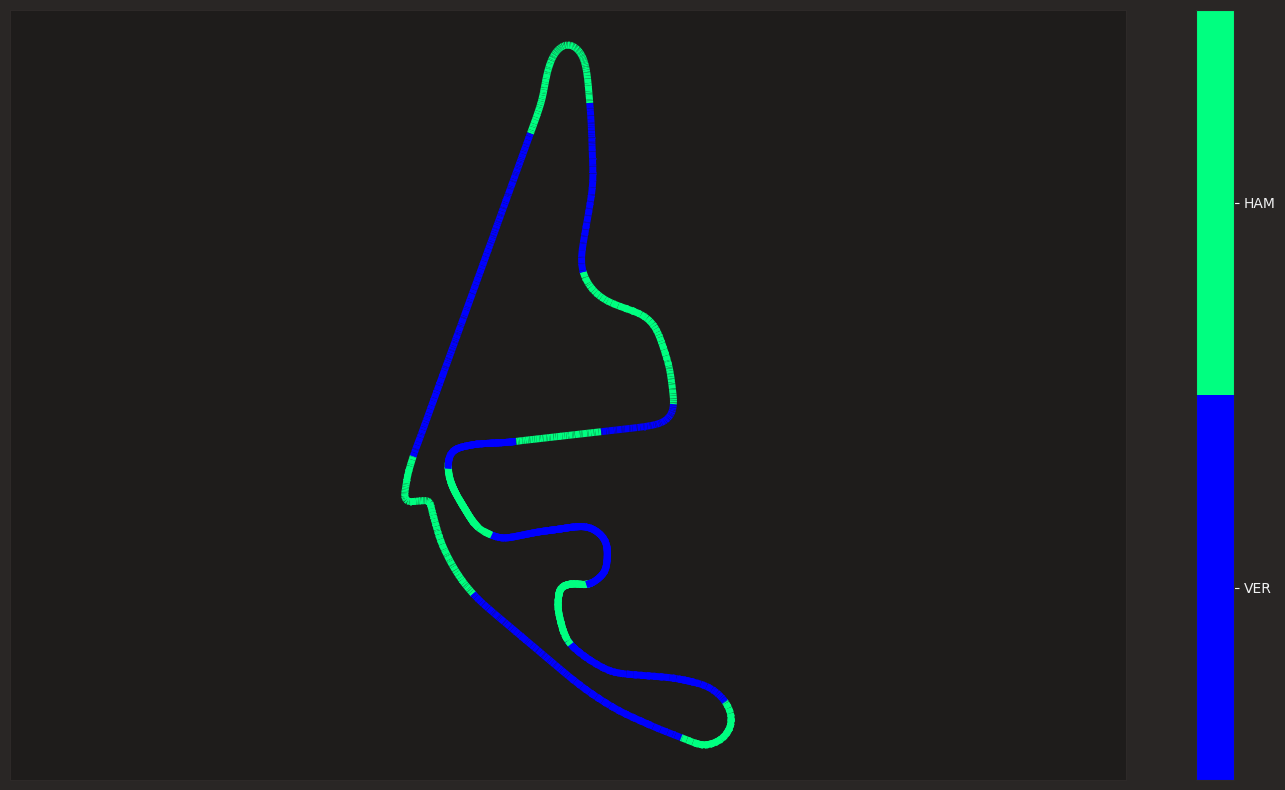

In [203]:
# Extracting x and y coordinates
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

# Combining x and y coordinates
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest Driver int'].to_numpy().astype(float)

# Colorng the line based on the fastest driver
cmap = cm.get_cmap('winter', 2) # plasma winter magma inferno viridis
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap = cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

# making the plot bigger
plt.rcParams["figure.figsize"] = (18, 10)

# Plotting
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False,left=False,labelbottom=False,bottom=False)

# # addind legend
# cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))
# cbar.set_ticks(np.arange(1.5,9.5))
# cbar.set_ticklabels(['VER', 'HAM'])

# Adding legend
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))  # Adjusted boundaries to match driver indices
cbar.set_ticks([1.5, 2.5])  # Setting exact tick locations for 'VER' and 'HAM'
cbar.set_ticklabels(['VER', 'HAM'])  # Correct number of labels

plt.savefig(f"2021_ver_ham_q.png", dpi=300)
plt.show()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:1591: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-package

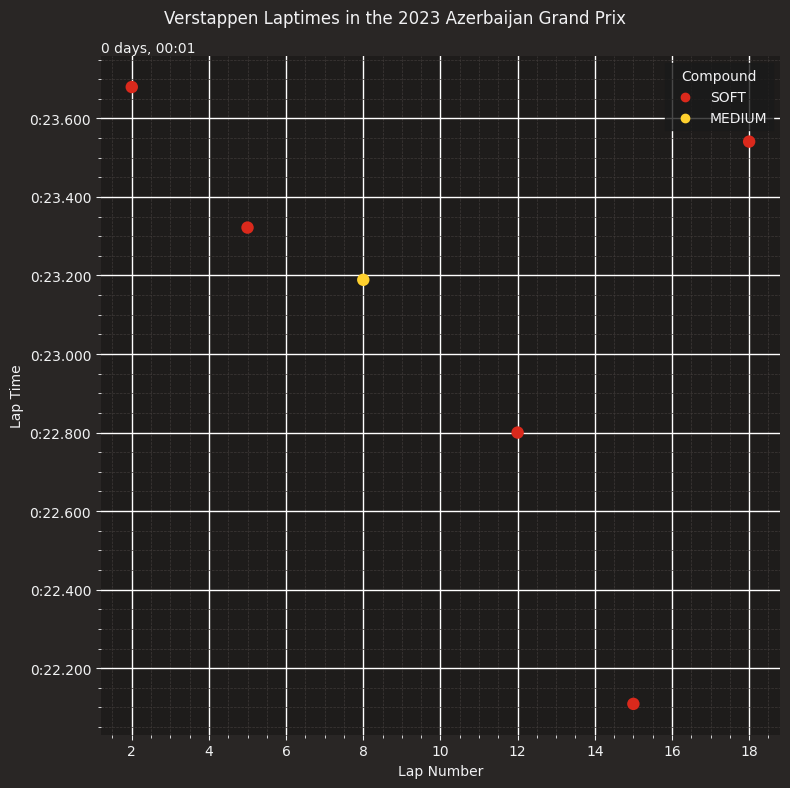

In [213]:
# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
ff1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')


###############################################################################
# Load the race session.

race = session
race.load()

###############################################################################
# Get all the laps for a single driver.
# Filter out slow laps as they distort the graph axis.

driver_laps = race.laps.pick_drivers("VER").pick_quicklaps().reset_index()

###############################################################################
# Make the scattterplot using lap number as x-axis and lap time as y-axis.
# Marker colors correspond to the compounds used.
# Note: as LapTime is represented by timedelta, calling setup_mpl earlier
# is required.

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=ff1.plotting.get_compound_mapping(session=race),
                s=80,
                linewidth=0,
                legend='auto')
# sphinx_gallery_defer_figures

###############################################################################
# Make the plot more aesthetic.
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Verstappen Laptimes in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] \
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] \
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

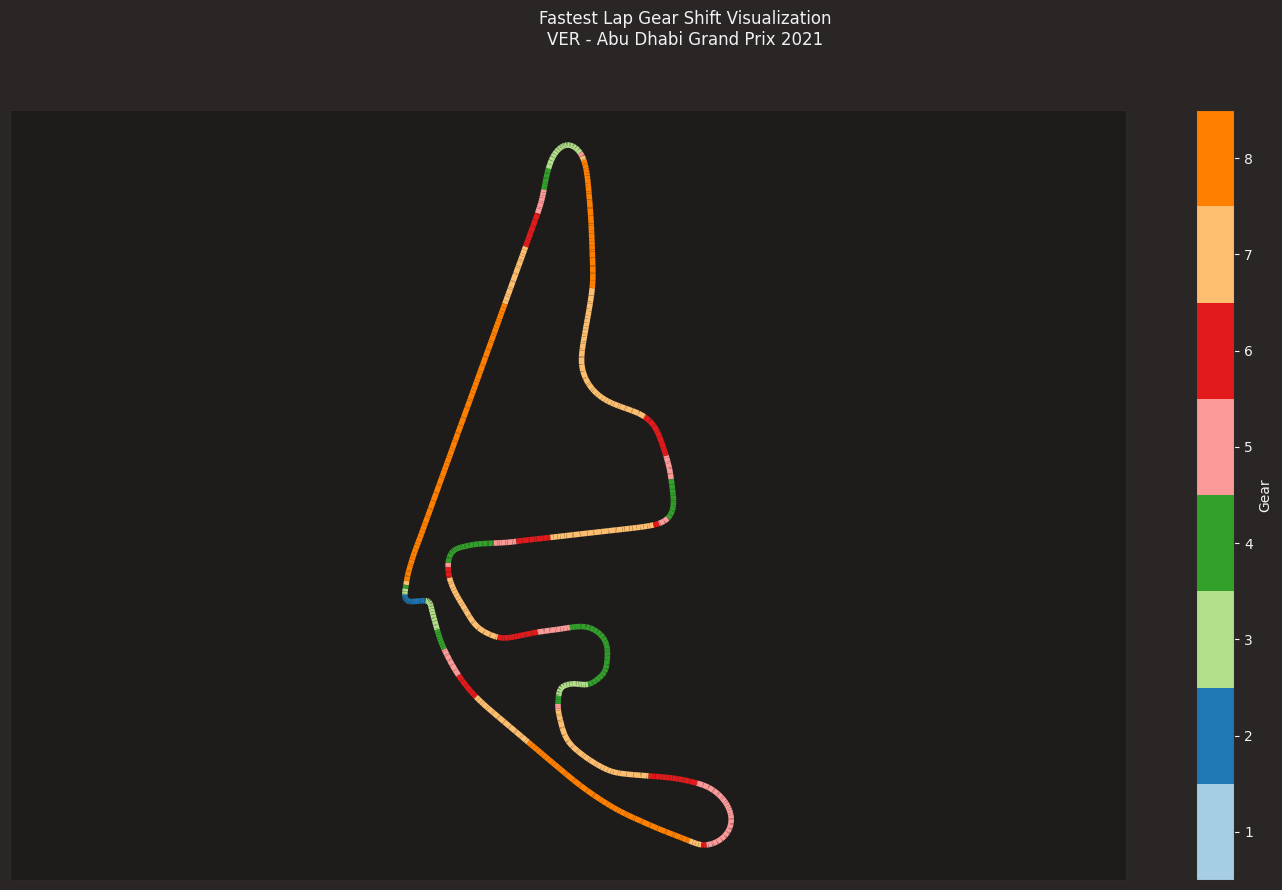

In [216]:
session = session
# session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()
# sphinx_gallery_defer_figures

##############################################################################
# Prepare the data for plotting by converting it to the appropriate numpy
# data types

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)
# sphinx_gallery_defer_figures

##############################################################################
# Create a line collection. Set a segmented colormap and normalize the plot
# to full integer values of the colormap

cmap = plt.colormaps['Paired']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)
# sphinx_gallery_defer_figures

##############################################################################
# Create the plot

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)
# sphinx_gallery_defer_figures


##############################################################################
# Add a colorbar to the plot. Shift the colorbar ticks by +0.5 so that they
# are centered for each color segment.

cbar = plt.colorbar(mappable=lc_comp, label="Gear",
                    boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

['33', '44', '4', '11', '55', '77', '16', '22', '31', '3']
['VER', 'HAM', 'NOR', 'PER', 'SAI', 'BOT', 'LEC', 'TSU', 'OCO', 'RIC']


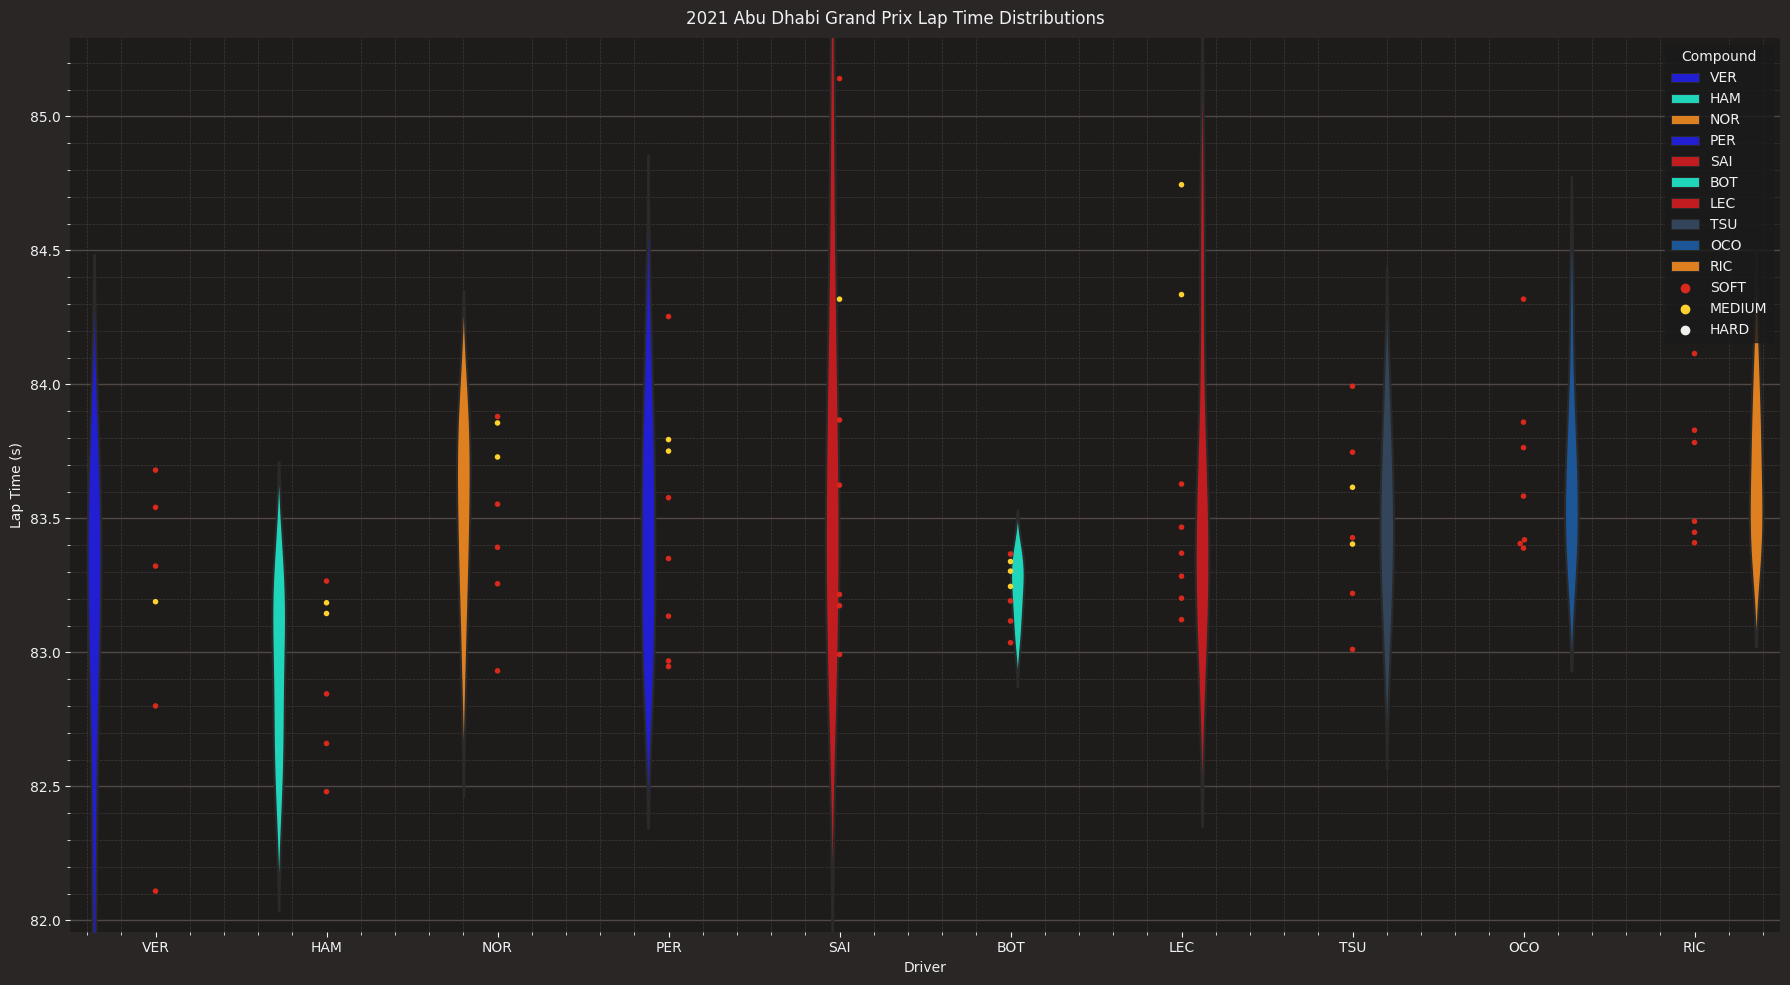

In [221]:
###############################################################################
# Load the race session

race = session
# race.load()

###############################################################################
# Get all the laps for the point finishers only.
# Filter out slow laps (yellow flag, VSC, pitstops etc.)
# as they distort the graph axis.
point_finishers = race.drivers[:10]
print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

###############################################################################
# To plot the drivers by finishing order,
# we need to get their three-letter abbreviations in the finishing order.
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

###############################################################################
# First create the violin plots to show the distributions.
# Then use the swarm plot to show the actual laptimes.

# create the figure
fig, ax = plt.subplots(figsize=(18, 10))

# Seaborn doesn't have proper timedelta support,
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=ff1.plotting.get_driver_color_mapping(session=race)
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=ff1.plotting.get_compound_mapping(session=race),
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )
# sphinx_gallery_defer_figures

###############################################################################
# Make the plot more aesthetic
ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("2021 Abu Dhabi Grand Prix Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:1591: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

No laps for driver 9. Skipping.


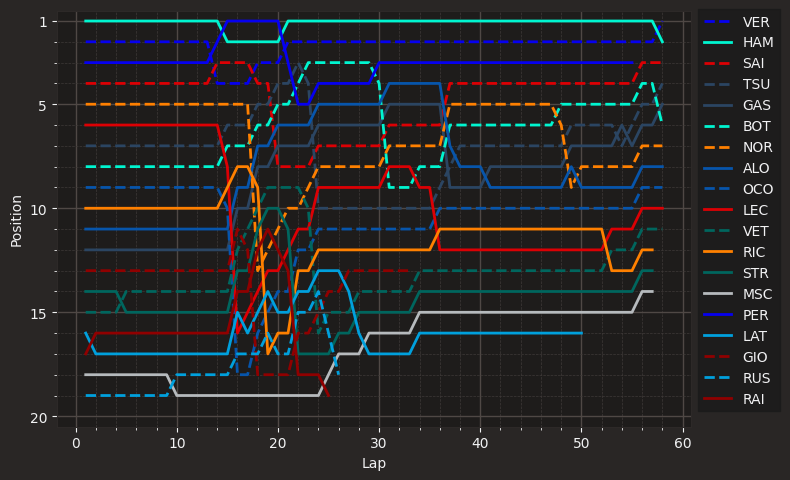

In [249]:
# Load FastF1's dark color scheme
ff1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False, color_scheme='fastf1')

# Load the session and ensure all data is loaded
session = ff1.get_session(2021, 'Abu Dhabi', 'R')  # Try a different session
session.load()  # Load all data

fig, ax = plt.subplots(figsize=(8.0, 4.9))

for drv in session.drivers:
    drv_laps = session.laps.pick_drivers(drv)
    if drv_laps.empty:
        print(f"No laps for driver {drv}. Skipping.")
        continue

    # Check if 'Position' column exists
    if 'Position' not in drv_laps.columns:
        print(f"'Position' column not found for driver {drv}.")
        continue

    # Check for NaN values in 'Position'
    if drv_laps['Position'].isna().all():
        print(f"'Position' data is NaN for driver {drv}.")
        continue

    # Proceed with plotting
    abb = drv_laps['Driver'].iloc[0]
    
    # abb = drv_laps['Driver'].iloc[0]
    style = ff1.plotting.get_driver_style(identifier=abb,
                                             style=['color', 'linestyle'],
                                             session=session)

    # ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            # label=abb, **style)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'], label=abb, linewidth=2, **style)

# Adjust y-axis limits
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()
plt.show()


core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2021/22/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\urllib3\connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
  File "C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\urllib3\connection.py", line 466, in getresponse
    httplib_response = super().getresponse()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\http\client.py", line 1375, in getresponse
    response.begin()
  File "C:\Program Files\WindowsApps

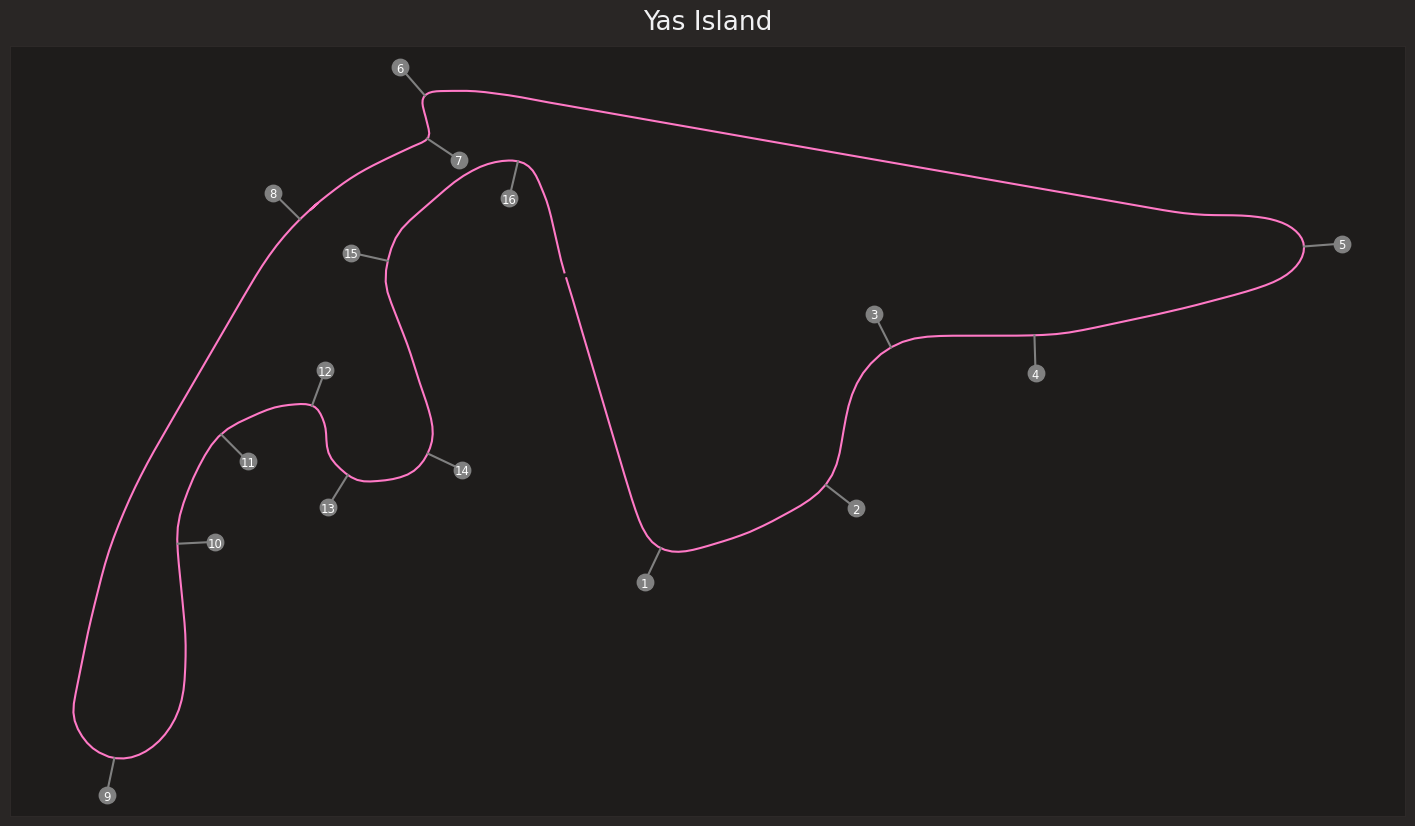

In [250]:
"""Draw a track map with numbered corners
=========================================

Use the position data of a single lap to draw a track map.
Then annotate the map with corner numbers.
"""
##############################################################################
# Import FastF1 and load the data. Use the telemetry from the fastest for the
# track map. (You could also use any other lap instead.)




# session = ff1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()


##############################################################################
# Define a helper function for rotating points around the origin of the
# coordinate system.
#
# The matrix ``[[cos, sin], [-sin, cos]]`` is called a rotation matrix.
#
# By matrix multiplication of the rotation matrix with a vector [x, y], a new
# rotated vector [x_rot, y_rot] is obtained.
# (See also: https://en.wikipedia.org/wiki/Rotation_matrix)

def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)


##############################################################################
# Get the coordinates of the track map from the telemetry of the lap and
# rotate the coordinates using the rotation from ``circuit_info`` so that
# the track map is oriented correctly. After that, plot the rotated track map.

# Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

# sphinx_gallery_defer_figures


##############################################################################
# Finally, the corner markers are plotted. To plot the numbers next to the
# track, an offset vector that points straight up is defined. This offset
# vector is then rotated by the angle that is given for each corner marker.
# A line and circular bubble are drawn and the corner marker text is printed
# inside the bubble.

offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')

# sphinx_gallery_defer_figures


##############################################################################
# Add a title, remove tick labels to clean up the plot, set equal axis ratio,
# so that the track is not distorted and show the plot.

plt.title(session.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data

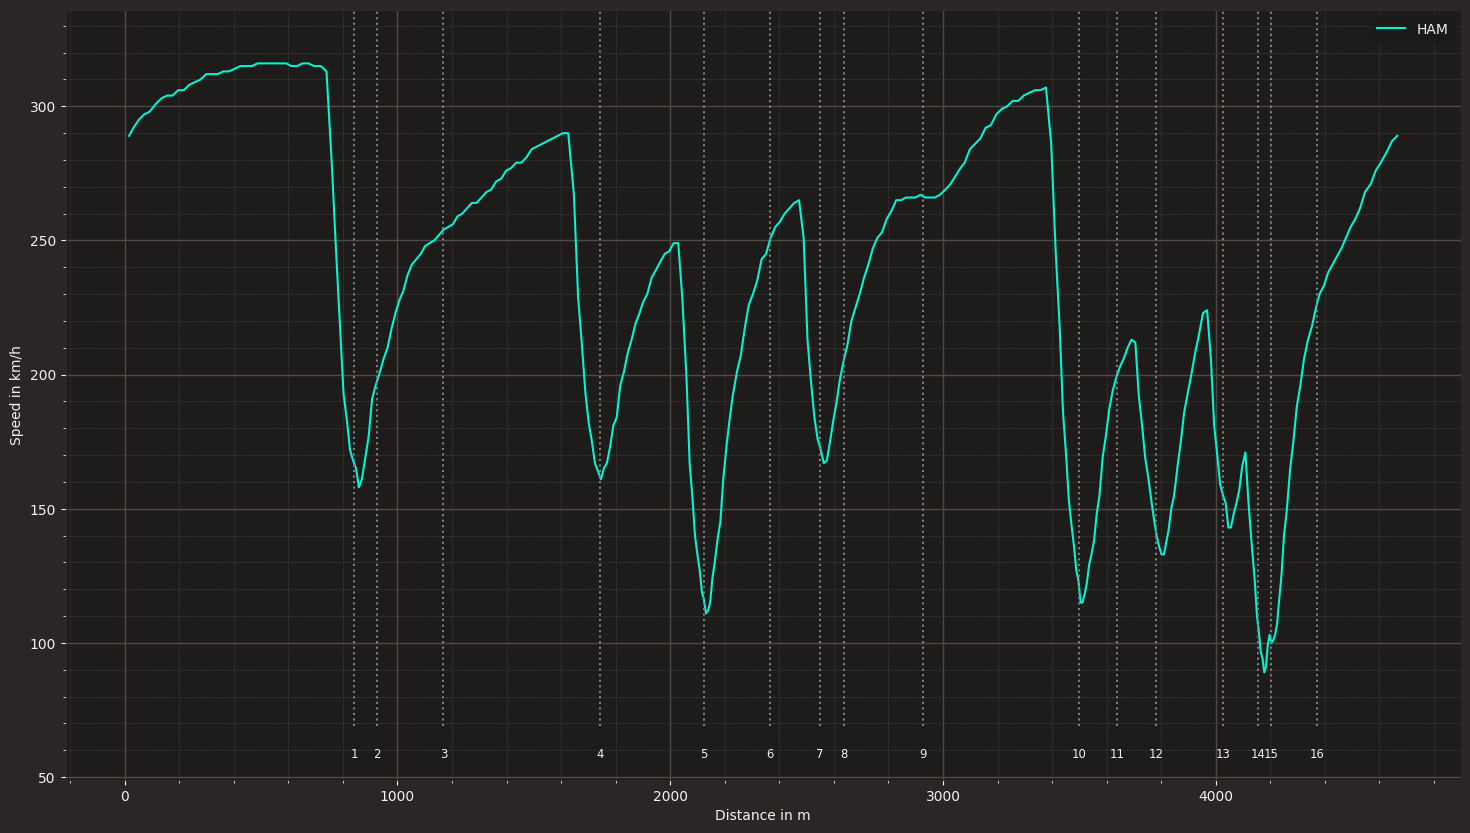

In [253]:
"""Plot speed traces with corner annotations
============================================

Plot the speed over the course of a lap and add annotations to mark corners.
"""




# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
ff1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

# # load a session and its telemetry data
# session = ff1.get_session(2021, 'Spanish Grand Prix', 'Q')
session.load()

##############################################################################
# First, we select the fastest lap and get the car telemetry data for this
# lap.

fastest_lap = session.laps.pick_fastest()
car_data = fastest_lap.get_car_data().add_distance()

##############################################################################
# Next, load the circuit info that includes the information about the location
# of the corners.

circuit_info = session.get_circuit_info()

##############################################################################
# Finally, we create a plot and plot the speed trace as well as the corner
# markers.

team_color = ff1.plotting.get_team_color(fastest_lap['Team'],
                                            session=session)

fig, ax = plt.subplots()
ax.plot(car_data['Distance'], car_data['Speed'],
        color=team_color, label=fastest_lap['Driver'])

# Draw vertical dotted lines at each corner that range from slightly below the
# minimum speed to slightly above the maximum speed.
v_min = car_data['Speed'].min()
v_max = car_data['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Plot the corner number just below each vertical line.
# For corners that are very close together, the text may overlap. A more
# complicated approach would be necessary to reliably prevent this.
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt,
            va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Manually adjust the y-axis limits to include the corner numbers, because
# Matplotlib does not automatically account for text that was manually added.
ax.set_ylim([v_min - 40, v_max + 20])

plt.show()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2021/22/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\urllib3\connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
  File "C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\urllib3\connection.py", line 466, in getresponse
    httplib_response = super().getresponse()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\http\client.py", line 1375, in getresponse
    response.begin()
  File "C:\Program Files\Wi

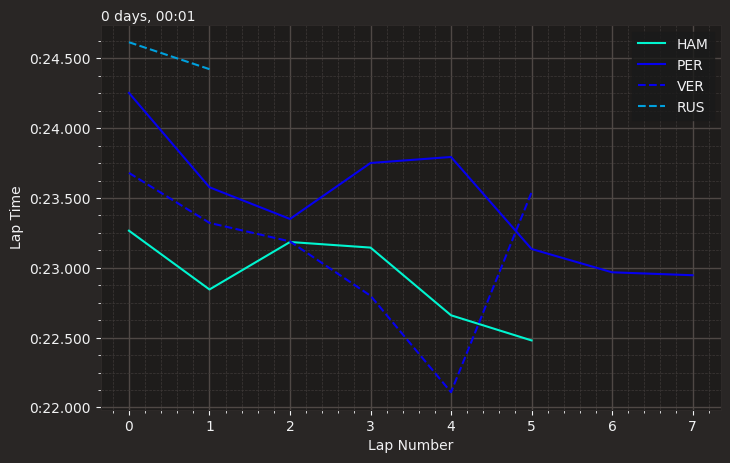

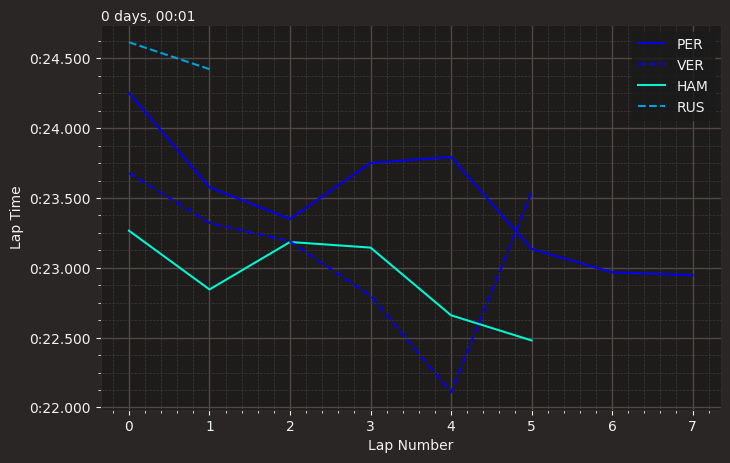

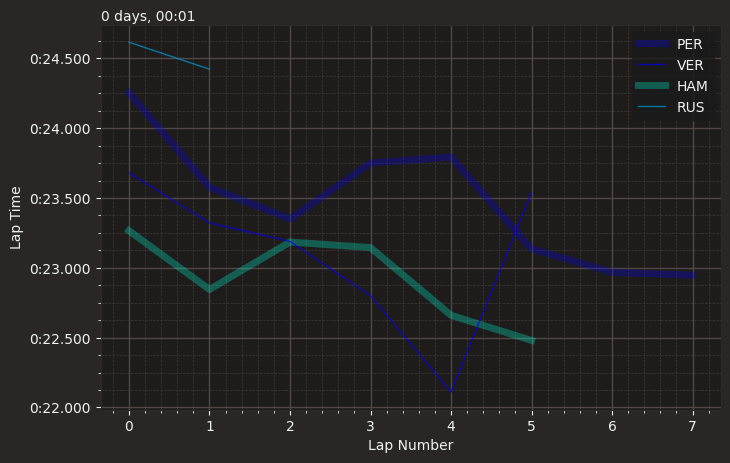

In [255]:
"""Driver specific plot styling
===============================

Create some plots and show the usage of ``fastf1.plotting.get_driver_style``.
"""

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')


###############################################################################
# Load the race session.

# race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

###############################################################################
# Basic driver-specific plot styling
# ----------------------------------
# Plot all the laps for Hamilton, Russel, Perez and Verstappen.
# Filter out slow laps as they distort the graph axis.
# Note: as LapTime is represented by timedelta, calling ``setup_mpl`` earlier
# is required.

fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.legend()

###############################################################################
# Sorting the legend
# ------------------
# That plot looks pretty good already, but the order of the labels in the
# legend is slightly chaotic. Instead of trying to order the labels manually,
# use :func:`fastf1.plotting.add_sorted_driver_legend`.
# Let's create the exact same plot again, but this time with a sorted legend
# which means, we only change the very last function call.

fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plotting.add_sorted_driver_legend(ax, race)

###############################################################################
# Creating fully custom styles
# ----------------------------
# If you want to fully customize the plot style, you can define your own
# styling variants.
#
# Note that the value ``'auto'`` is treated as a magic keyword when used in
# combination with a color. It will be replaced with the team color.
#
# We define two styles, one for the first driver and one for the second driver
# in any team.
#
# The plot that is generated here isn't intended to be very readable, but it
# shows how you can customize any plot styling parameter.

my_styles = [
    # style for each first driver
    {'color': 'auto', 'linestyle': 'solid', 'linewidth': 5, 'alpha': 0.3},
    # style for each second driver
    {'color': 'auto', 'linestyle': 'solid', 'linewidth': 1, 'alpha': 0.7}
]

fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()

    # here, we now use ``style=my_style`` to use the custom styling
    style = plotting.get_driver_style(identifier=driver,
                                      style=my_styles,
                                      session=race)

    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plotting.add_sorted_driver_legend(ax, race)
plt.show()

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:1591: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = p

['VER' 'HAM' 'LEC' 'SAI' 'BOT' 'NOR' 'GAS' 'RIC' 'RAI' 'PER' 'ALO' 'TSU'
 'OCO' 'STR' 'RUS' 'GIO' 'VET' 'LAT' 'MSC' 'MAZ']
   Driver                LapTime           LapTimeDelta
0     HAM 0 days 00:01:16.741000        0 days 00:00:00
1     VER 0 days 00:01:16.777000 0 days 00:00:00.036000
2     BOT 0 days 00:01:16.873000 0 days 00:00:00.132000
3     LEC 0 days 00:01:17.510000 0 days 00:00:00.769000
4     OCO 0 days 00:01:17.580000 0 days 00:00:00.839000
5     SAI 0 days 00:01:17.620000 0 days 00:00:00.879000
6     RIC 0 days 00:01:17.622000 0 days 00:00:00.881000
7     PER 0 days 00:01:17.669000 0 days 00:00:00.928000
8     NOR 0 days 00:01:17.696000 0 days 00:00:00.955000
9     ALO 0 days 00:01:17.966000 0 days 00:00:01.225000
10    STR 0 days 00:01:17.974000 0 days 00:00:01.233000
11    GAS 0 days 00:01:17.982000 0 days 00:00:01.241000
12    VET 0 days 00:01:18.079000 0 days 00:00:01.338000
13    GIO 0 days 00:01:18.356000 0 days 00:00:01.615000
14    RUS 0 days 00:01:18.445000 0 da

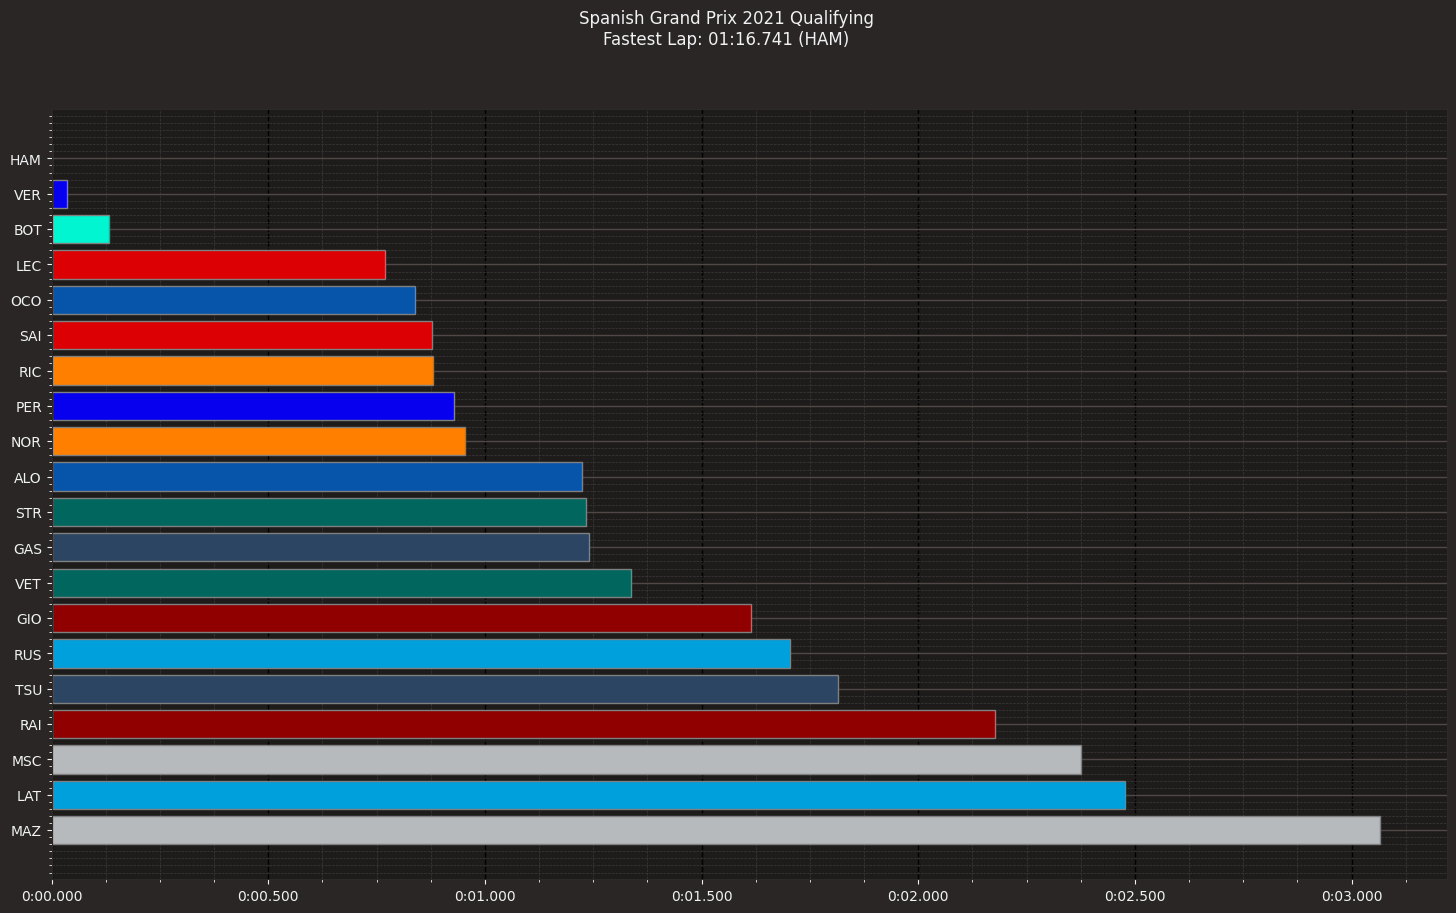

In [260]:
"""Qualifying results overview
==============================

Plot the qualifying result with visualization the fastest times.
"""


# import matplotlib.pyplot as plt
# import pandas as pd
from timple.timedelta import strftimedelta

# import fastf1
# import fastf1.plotting
from fastf1.core import Laps



# Enable Matplotlib patches for plotting timedelta values
ff1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme=None)


session.load()


##############################################################################
# First, we need to get an array of all drivers.

drivers = pd.unique(session.laps['Driver'])
print(drivers)


##############################################################################
# After that we'll get each driver's fastest lap, create a new laps object
# from these laps, sort them by lap time and have pandas reindex them to
# number them nicely by starting position.

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_drivers(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps) \
    .sort_values(by='LapTime') \
    .reset_index(drop=True)


##############################################################################
# The plot is nicer to look at and more easily understandable if we just plot
# the time differences. Therefore, we subtract the fastest lap time from all
# other lap times.

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']


##############################################################################
# We can take a quick look at the laps we have to check if everything
# looks all right. For this, we'll just check the 'Driver', 'LapTime'
# and 'LapTimeDelta' columns.

print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])


##############################################################################
# Finally, we'll create a list of team colors per lap to color our plot.
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=session)
    team_colors.append(color)


##############################################################################
# Now, we can plot all the data
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
# sphinx_gallery_defer_figures


##############################################################################
# Finally, give the plot a meaningful title

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

In [264]:
# """Plot driver standings in a heatmap
# ======================================

# Plot the points for each driven in each race of a given season in a heatmap, as
# https://public.tableau.com/app/profile/mateusz.karmalski/viz/F1ResultsTracker2022
# """

# import pandas as pd
# import plotly.express as px
# from plotly.io import show

# from fastf1.ergast import Ergast


# ##############################################################################
# # First, we load the results for season 2022.
# ergast = Ergast()
# races = ergast.get_race_schedule(2022)  # Races in year 2022
# results = []

# # For each race in the season
# for rnd, race in races['raceName'].items():

#     # Get results. Note that we use the round no. + 1, because the round no.
#     # starts from one (1) instead of zero (0)
#     temp = ergast.get_race_results(season=2022, round=rnd + 1)
#     temp = temp.content[0]

#     # If there is a sprint, get the results as well
#     sprint = ergast.get_sprint_results(season=2022, round=rnd + 1)
#     if sprint.content and sprint.description['round'][0] == rnd + 1:
#         temp = pd.merge(temp, sprint.content[0], on='driverCode', how='left')
#         # Add sprint points and race points to get the total
#         temp['points'] = temp['points_x'] + temp['points_y']
#         temp.drop(columns=['points_x', 'points_y'], inplace=True)

#     # Add round no. and grand prix name
#     temp['round'] = rnd + 1
#     temp['race'] = race.removesuffix(' Grand Prix')
#     temp = temp[['round', 'race', 'driverCode', 'points']]  # Keep useful cols.
#     results.append(temp)

# # Append all races into a single dataframe
# results = pd.concat(results)
# races = results['race'].drop_duplicates()

# ##############################################################################
# # Then we “reshape” the results to a wide table, where each row represents a
# # driver and each column refers to a race, and the cell value is the points.
# results = results.pivot(index='driverCode', columns='round', values='points')
# # Here we have a 22-by-22 matrix (22 races and 22 drivers, incl. DEV and HUL)

# # Rank the drivers by their total points
# results['total_points'] = results.sum(axis=1)
# results = results.sort_values(by='total_points', ascending=False)
# results.drop(columns='total_points', inplace=True)

# # Use race name, instead of round no., as column names
# results.columns = races


# ##############################################################################
# # The final step is to plot a heatmap using plotly
# fig = px.imshow(
#     results,
#     text_auto=True,
#     aspect='auto',  # Automatically adjust the aspect ratio
#     color_continuous_scale=[[0,    'rgb(198, 219, 239)'],  # Blue scale
#                             [0.25, 'rgb(107, 174, 214)'],
#                             [0.5,  'rgb(33,  113, 181)'],
#                             [0.75, 'rgb(8,   81,  156)'],
#                             [1,    'rgb(8,   48,  107)']],
#     labels={'x': 'Race',
#             'y': 'Driver',
#             'color': 'Points'}       # Change hover texts
# )
# fig.update_xaxes(title_text='')      # Remove axis titles
# fig.update_yaxes(title_text='')
# fig.update_yaxes(tickmode='linear')  # Show all ticks, i.e. driver names
# fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey',
#                  showline=False,
#                  tickson='boundaries')              # Show horizontal grid only
# fig.update_xaxes(showgrid=False, showline=False)    # And remove vertical grid
# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')     # White background
# fig.update_layout(coloraxis_showscale=False)        # Remove legend
# fig.update_layout(xaxis=dict(side='top'))           # x-axis on top
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))  # Remove border margins
# fig
# show(fig)

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api    

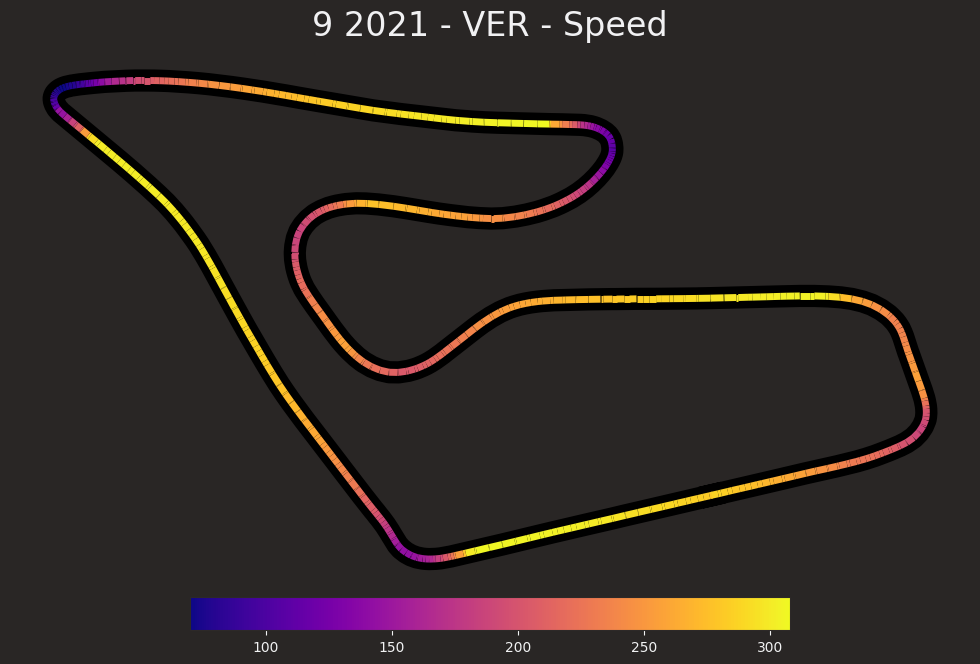

In [268]:
"""Speed visualization on track map
======================================

"""
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1


##############################################################################
# First, we define some variables that allow us to conveniently control what
# we want to plot.
year = 2021
wknd = 9
ses = 'R'
driver = 'VER'
colormap = mpl.cm.plasma


##############################################################################
# Next, we load the session and select the desired data.
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_drivers(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on


##############################################################################
# Now, we create a set of line segments so that we can color them
# individually. This creates the points as a N x 1 x 2 array so that we can
# stack points  together easily to get the segments. The segments array for
# line collection needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


##############################################################################
# After this, we can actually plot the data.

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:1591: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True

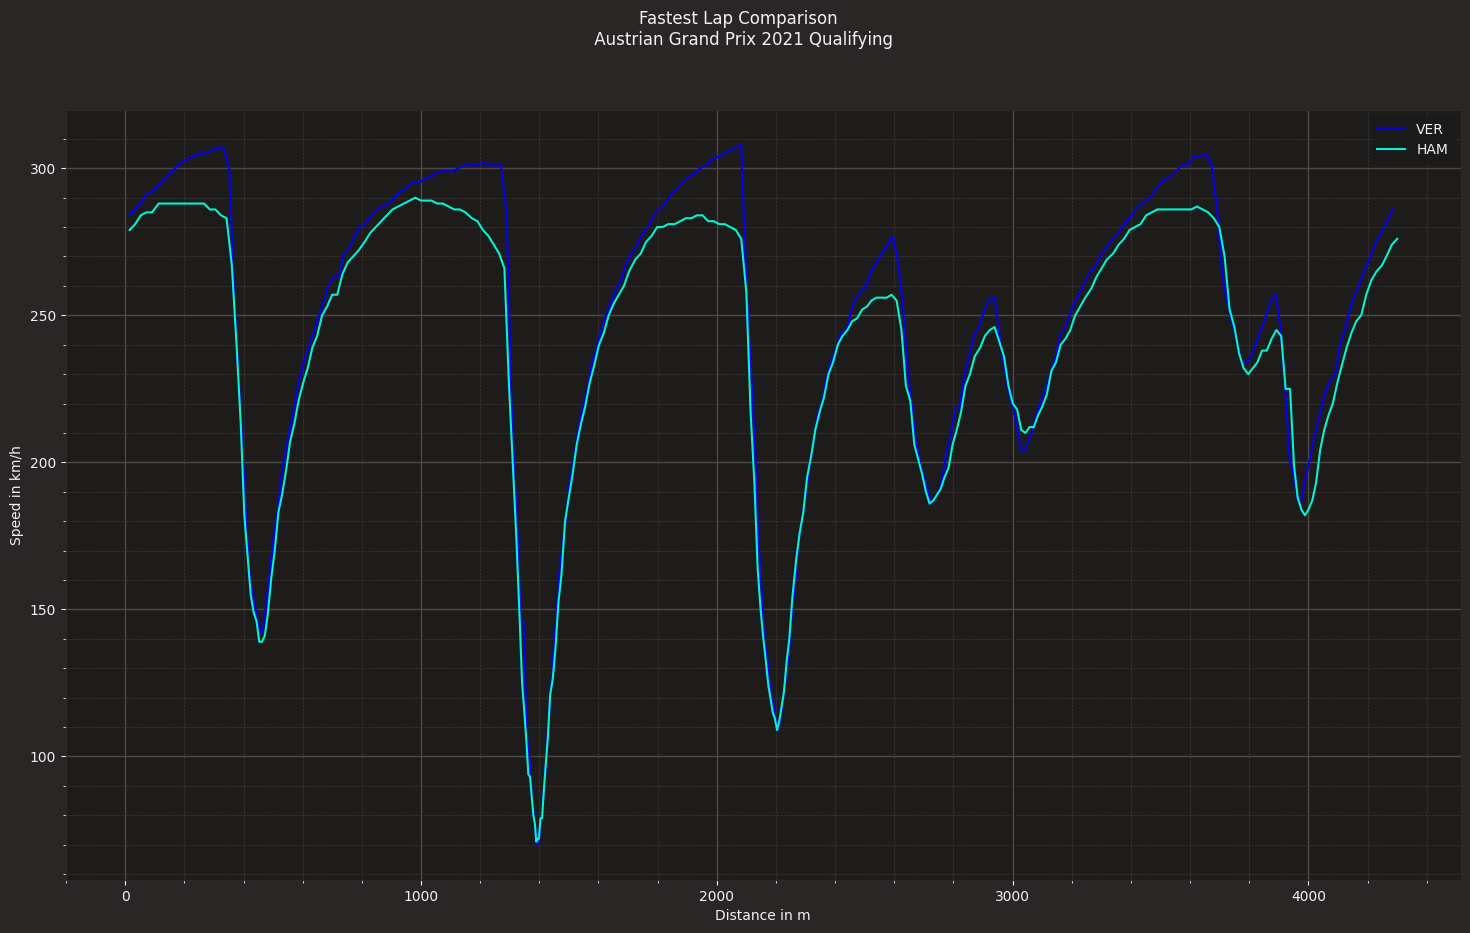

In [ ]:
"""Overlaying speed traces of two laps
======================================

Compare two fastest laps by overlaying their speed traces.
"""



# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
ff1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

# load a session and its telemetry data
# session = ff1.get_session(2021, 'Abu Dhabi', 'Q')
session.load()

##############################################################################
# First, we select the two laps that we want to compare

ver_lap = session.laps.pick_drivers('VER').pick_fastest()
ham_lap = session.laps.pick_drivers('HAM').pick_fastest()

##############################################################################
# Next we get the telemetry data for each lap. We also add a 'Distance' column
# to the telemetry dataframe as this makes it easier to compare the laps.

ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

##############################################################################
# Finally, we create a plot and plot both speed traces.
# We color the individual lines with the driver's team colors.

rbr_color = ff1.plotting.get_team_color(ver_lap['Team'], session=session)
mer_color = ff1.plotting.get_team_color(ham_lap['Team'], session=session)

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:1591: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True

['33', '4', '11', '44', '77', '10', '22', '63', '18', '55', '5', '16', '3', '14', '99', '7', '31', '6', '47', '9']
['VER', 'NOR', 'PER', 'HAM', 'BOT', 'GAS', 'TSU', 'RUS', 'STR', 'SAI', 'VET', 'LEC', 'RIC', 'ALO', 'GIO', 'RAI', 'OCO', 'LAT', 'MSC', 'MAZ']
   Driver  Stint Compound  StintLength
0     ALO    1.0   MEDIUM           32
1     ALO    2.0     HARD           38
2     BOT    1.0   MEDIUM           30
3     BOT    2.0     HARD           41
4     GAS    1.0     SOFT           13
5     GAS    2.0     HARD           32
6     GAS    3.0     HARD           26
7     GIO    1.0   MEDIUM            1
8     GIO    2.0     HARD           28
9     GIO    3.0     HARD           41
10    HAM    1.0   MEDIUM           31
11    HAM    2.0     HARD           22
12    HAM    3.0     HARD           18
13    LAT    1.0   MEDIUM           33
14    LAT    2.0     HARD           37
15    LEC    1.0   MEDIUM           34
16    LEC    2.0     HARD           37
17    MAZ    1.0   MEDIUM           27
18 

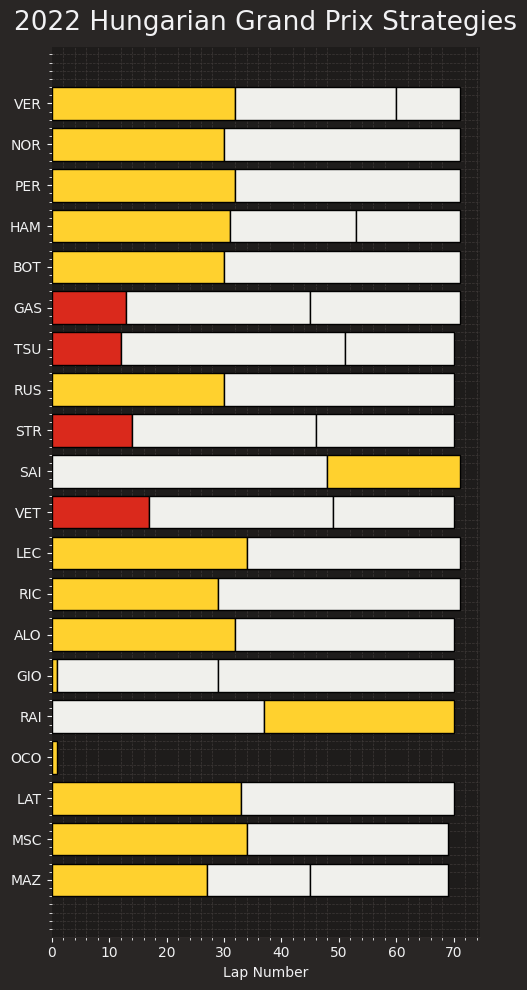

In [270]:
"""
Tyre strategies during a race
=============================

Plot all drivers' tyre strategies during a race.
"""

from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


###############################################################################
# Load the race session

# session = fastf1.get_session(2022, "Hungary", 'R')
session.load()
laps = session.laps

###############################################################################
# Get the list of driver numbers
drivers = session.drivers
print(drivers)

###############################################################################
# Convert the driver numbers to three letter abbreviations
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

###############################################################################
# We need to find the stint length and compound used
# for every stint by every driver.
# We do this by first grouping the laps by the driver,
# the stint number, and the compound.
# And then counting the number of laps in each group.
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

###############################################################################
# The number in the LapNumber column now stands for the number of observations
# in that group aka the stint length.
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

###############################################################################
# Now we can plot the strategies for each driver
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

# sphinx_gallery_defer_figures

###############################################################################
# Make the plot more readable and intuitive
plt.title("2022 Hungarian Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

# sphinx_gallery_defer_figures

###############################################################################
# Plot aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:1591: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True

Index(['Red Bull Racing', 'Mercedes', 'McLaren', 'Alpine', 'AlphaTauri',
       'Ferrari', 'Williams', 'Aston Martin', 'Alfa Romeo Racing',
       'Haas F1 Team'],
      dtype='object', name='Team')


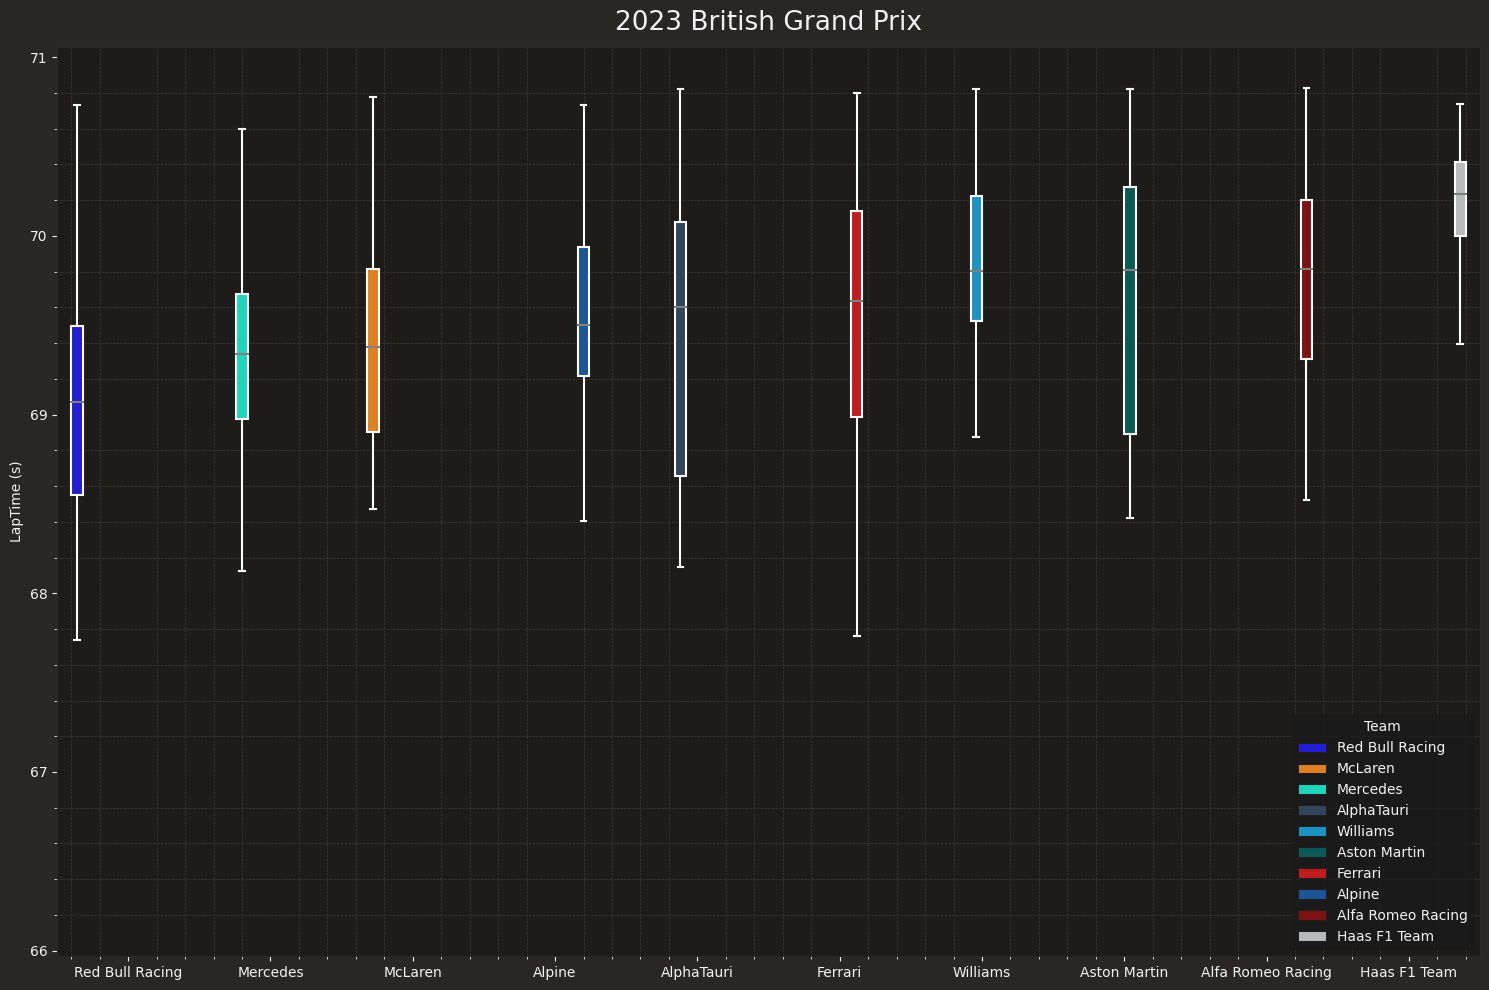

In [272]:
"""Team Pace Comparison
=============================================
Rank team's race pace from the fastest to the slowest.
"""

import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')


###############################################################################
# Load the race session.
# Pick all quick laps (within 107% of fastest lap).
# For races with mixed conditions, pick_wo_box() is better.
race = session
race.load()
laps = race.laps.pick_quicklaps()

###############################################################################
# Convert the lap time column from timedelta to integer.
# This is a seaborn-specific modification.
# If plotting with matplotlib, set mpl_timedelta_support to true
# with plotting.setup_mpl.
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.get_team_color(team, session=race)
                for team in team_order}

###############################################################################
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2023 British Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

In [ ]:
# """Who can still win the drivers WDC?
# ======================================

# Calculates which drivers still has chance to win the WDC.
# Simplified since it doesn't compare positions if points are equal.

# This example implements 3 functions that it then uses to calculate
# its result.
# """

# import fastf1
# from fastf1.ergast import Ergast


# ##############################################################################
# # For this example, we are looking at the 2023 season.
# # We want to know who can theoretically still win the drivers' championship
# # after the first 15 races.

# SEASON = 2023
# ROUND = 15


# ##############################################################################
# # Get the current driver standings from Ergast.
# # Reference https://docs.fastf1.dev/ergast.html#fastf1.ergast.Ergast.get_driver_standings
# def get_drivers_standings():
#     ergast = Ergast()
#     standings = ergast.get_driver_standings(season=SEASON, round=ROUND)
#     return standings.content[0]


# ##############################################################################
# # We need a function to calculates the maximum amount of points possible if a
# # driver wins everything left of the season.
# # https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems
# def calculate_max_points_for_remaining_season():
#     POINTS_FOR_SPRINT = 8 + 25 + 1  # Winning the sprint, race and fastest lap
#     POINTS_FOR_CONVENTIONAL = 25 + 1  # Winning the race and fastest lap

#     events = fastf1.events.get_event_schedule(SEASON, backend='ergast')
#     events = events[events['RoundNumber'] > ROUND]
#     # Count how many sprints and conventional races are left
#     sprint_events = len(events.loc[events["EventFormat"] == "sprint_shootout"])
#     conventional_events = len(events.loc[events["EventFormat"] == "conventional"])

#     # Calculate points for each
#     sprint_points = sprint_events * POINTS_FOR_SPRINT
#     conventional_points = conventional_events * POINTS_FOR_CONVENTIONAL

#     return sprint_points + conventional_points


# ##############################################################################
# # For each driver we will see if there is a chance to get more points than
# # the current leader. We assume the leader gets no more points and the
# # driver gets the theoretical maximum amount of points.
# #
# # We currently don't consider the case of two drivers getting equal points
# # since its more complicated and would require comparing positions.
# def calculate_who_can_win(driver_standings, max_points):
#     LEADER_POINTS = int(driver_standings.loc[0]['points'])

#     for i, _ in enumerate(driver_standings.iterrows()):
#         driver = driver_standings.loc[i]
#         driver_max_points = int(driver["points"]) + max_points
#         can_win = 'No' if driver_max_points < LEADER_POINTS else 'Yes'

#         print(f"{driver['position']}: {driver['givenName'] + ' ' + driver['familyName']}, "
#               f"Current points: {driver['points']}, "
#               f"Theoretical max points: {driver_max_points}, "
#               f"Can win: {can_win}")


# ##############################################################################
# # Now using the 3 functions above we can use them to calculate who
# # can still win.

# # Get the current drivers standings
# driver_standings = get_drivers_standings()

# # Get the maximum amount of points
# points = calculate_max_points_for_remaining_season()

# # Print which drivers can still win
# calculate_who_can_win(driver_standings, points)